**Белянинов ПМ22-1**

# Семинар

**Инжиниринг категориальных признаков**

In [114]:
import pandas as pd
import numpy as np
import sympy as sp
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

1. Загрузите прилагаемые к этой работе два датасета - Титаник и Customer support. Выведите основную информацию по каждому датасету и сделайте выводы
2. Визуализируйте распределение каждого категориального признака в датасете Customer support. Учитывайте количество уникальных значений.
3. Исследуйте связь каждого признака датасета Customer support с целевой переменной. Сделайте предварительный вывод о значимости признаков.
4. Где целесообразно, проведите укрупнение категорий, путем объединения разных значений в столбце.
5. Добавьте к датасету новый столбец, содержащий агрегированную информацию, которая предположительно будет полезна для моделирования целевой переменной.
6. Заполните отсутствующие значения в датасете.
7. На примере датасета Титаник проведите преобразование категориальных переменных разных шкал в численные.
8. В датасете Customer support удалите лишние столбцы и преобразуйте все категориальные переменные через get_dummies()

In [77]:
T_data = pd.read_csv('titanic.csv', index_col=0)
T_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
T_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 90.5+ KB


In [79]:
CS_data = pd.read_csv('Customer_support_data.csv', index_col=0)
CS_data.head()

,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
Unique id,,,,,,,,,,,,,,,,,,,
7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [80]:
CS_data.describe(include="all")

,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,Inbound,Returns,Reverse Pickup Enquiry,Good,c27c9bb4-fa36-4140-9f1f-21009254ffdb,09/08/2023 11:55,15/08/2023 10:59,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


In [81]:
T_data.describe(exclude=[np.number])

,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,3,891,2,681,147,3
top,third,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,491,1,577,7,4,644


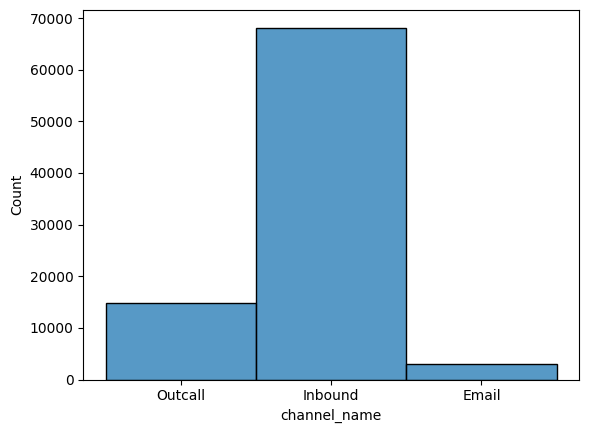

In [82]:
sns.histplot(data=CS_data, x="channel_name");

In [83]:
CS_data.channel_name.value_counts()

channel_name
Inbound    68142
Outcall    14742
Email       3023
Name: count, dtype: int64

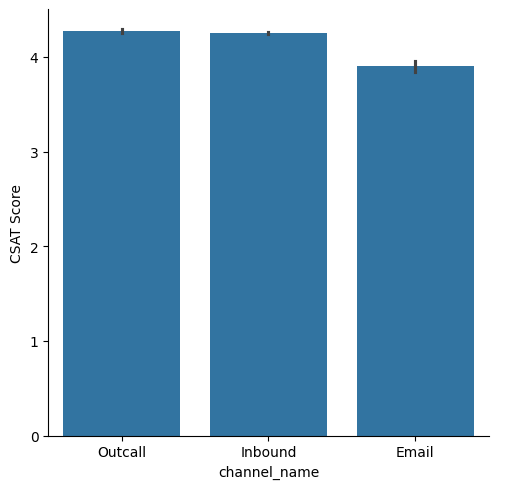

In [84]:
sns.catplot(data=CS_data, x="channel_name", y="CSAT Score", kind="bar")

In [85]:
CS_data.category.value_counts()

category
Returns               44097
Order Related         23215
Refund Related         4550
Product Queries        3692
Shopzilla Related      2792
Payments related       2327
Feedback               2294
Cancellation           2212
Offers & Cashback       480
Others                   99
App/website              84
Onboarding related       65
Name: count, dtype: int64

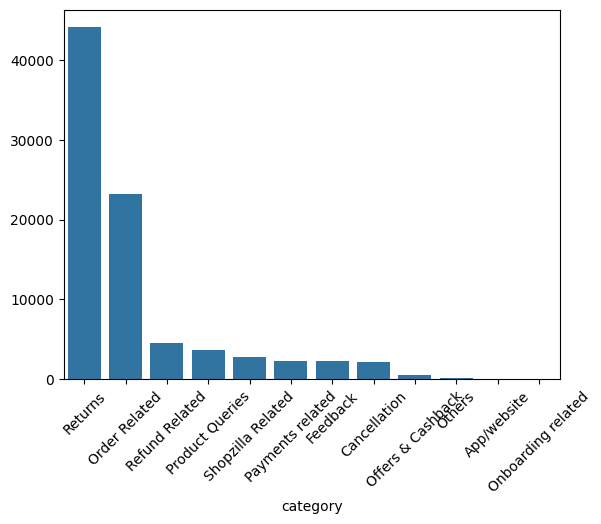

In [86]:
counts = CS_data.category.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

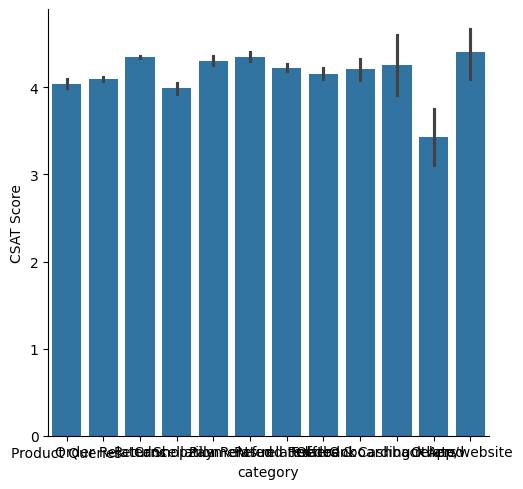

In [87]:
sns.catplot(data=CS_data, x="category", y="CSAT Score", kind="bar");

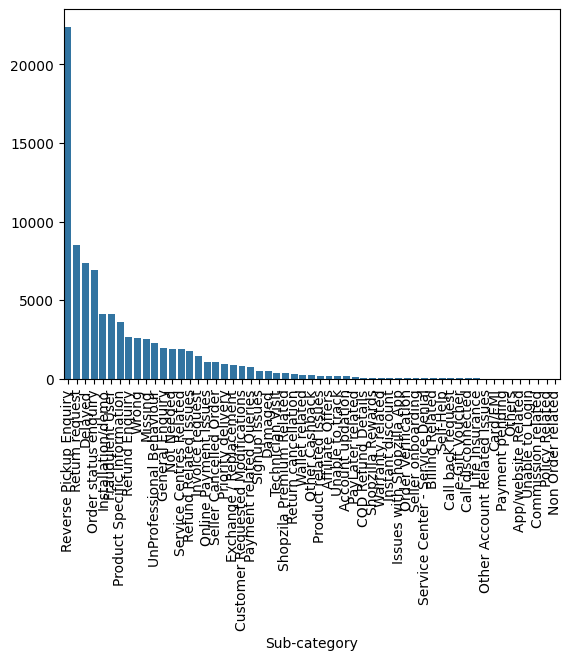

In [88]:
counts = CS_data['Sub-category'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.show()

In [89]:
CS_data['Sub-category'].value_counts().head(10)

Sub-category
Reverse Pickup Enquiry          22389
Return request                   8523
Delayed                          7388
Order status enquiry             6922
Installation/demo                4116
Fraudulent User                  4108
Product Specific Information     3589
Refund Enquiry                   2665
Wrong                            2597
Missing                          2556
Name: count, dtype: int64

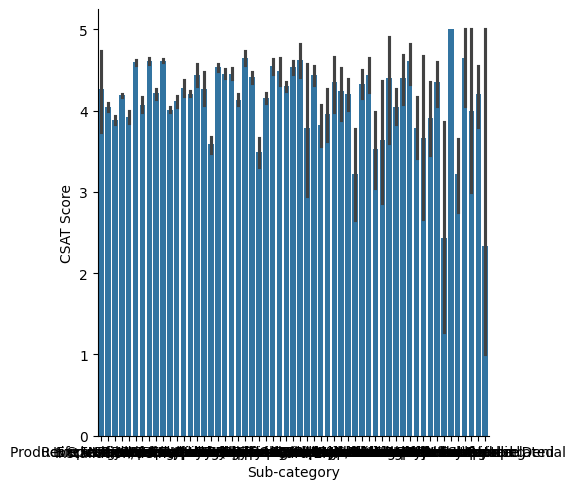

In [90]:
sns.catplot(data=CS_data, x="Sub-category", y="CSAT Score", kind="bar");

In [91]:
CS_data['Customer Remarks'].value_counts().head(10)

Customer Remarks
Good          1390
Good          1158
Very good      569
Nice           316
Thanks         276
Ok             259
No             258
Thank you      244
Nice           239
Very good      236
Name: count, dtype: int64

In [92]:
CS_data['Customer_City'].value_counts().head(10)

Customer_City
HYDERABAD    722
NEW DELHI    688
PUNE         435
MUMBAI       406
BANGALORE    352
CHENNAI      271
KOLKATA      270
LUCKNOW      254
AHMEDABAD    253
JAIPUR       243
Name: count, dtype: int64

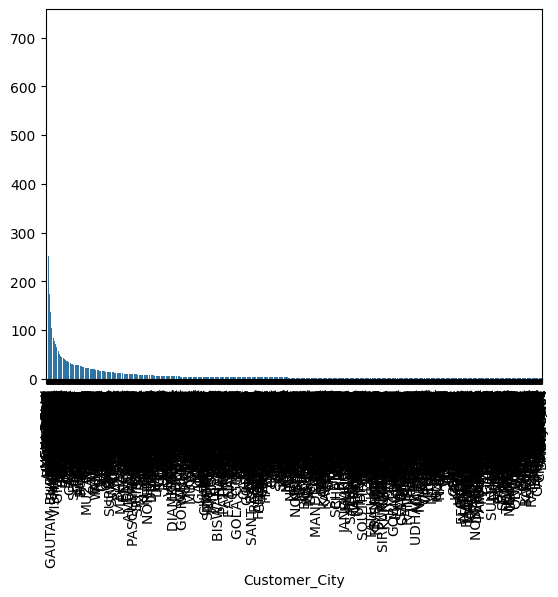

In [93]:
counts = CS_data['Customer_City'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.show()

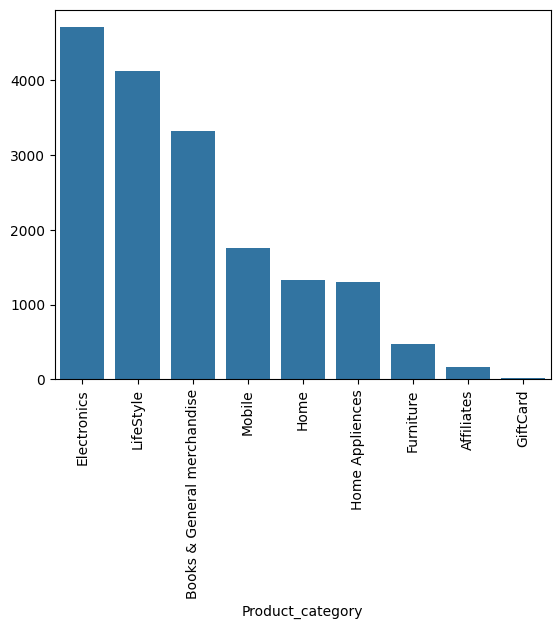

In [94]:
counts = CS_data['Product_category'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.show()

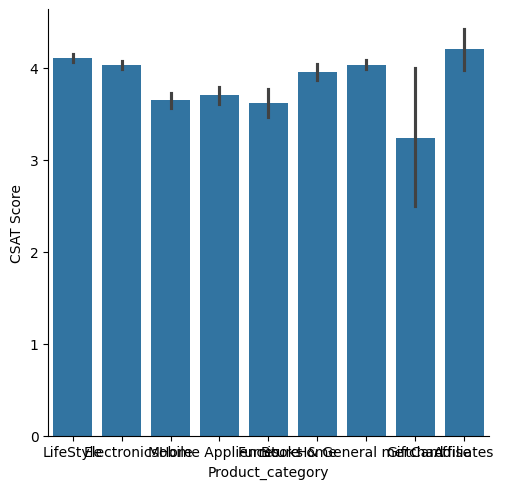

In [95]:
sns.catplot(data=CS_data, x="Product_category", y="CSAT Score",
            kind="bar");

In [96]:
CS_data['Agent_name'].value_counts().head(25)

Agent_name
Wendy Taylor           429
Timothy Huff           265
David Smith            264
Jamie Smith            253
Kayla Wilson           216
Julie Williams         200
Mrs. Jennifer Stone    200
Sharon Bullock         195
Matthew White PhD      192
Anthony Booth          177
Tina Harrington        177
Kristin Campbell       176
Brianna Wolf           176
Rebecca Walker         176
Jennifer Hernandez     174
Rebecca Graham         173
William Carey DVM      169
Ryan Thompson          167
Brandon Frost          161
Brian Young            160
Cole Moore             159
Timothy Grant          157
Kathryn Jones          157
Brittany Nunez         156
Tracy Weaver           154
Name: count, dtype: int64

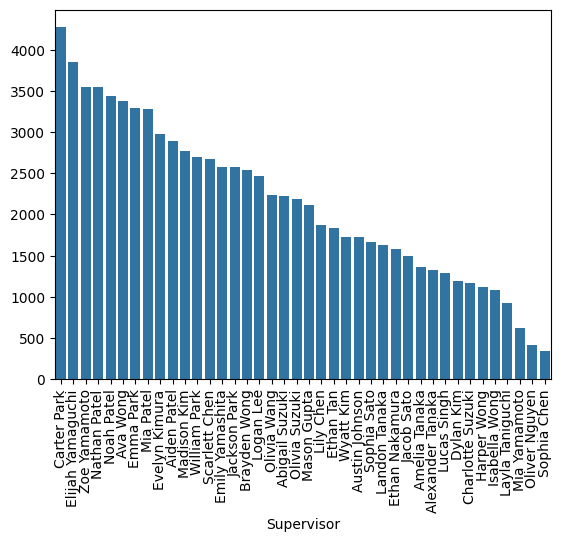

In [97]:
counts = CS_data['Supervisor'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.show()

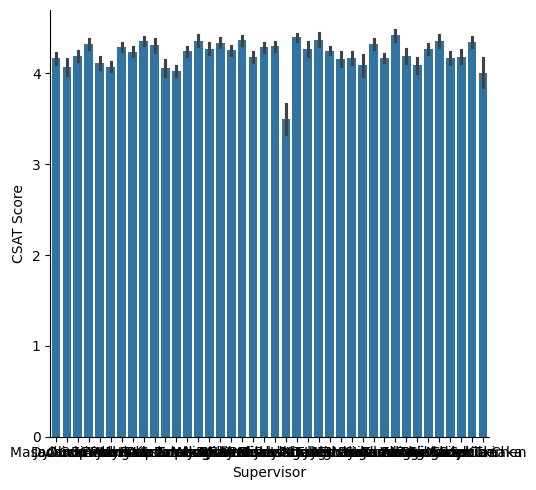

In [98]:
sns.catplot(data=CS_data, x="Supervisor", y="CSAT Score",
            kind="bar");

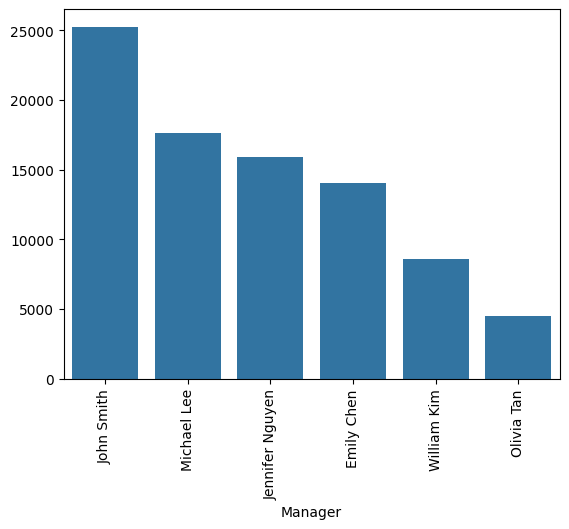

In [99]:
counts = CS_data['Manager'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.show()

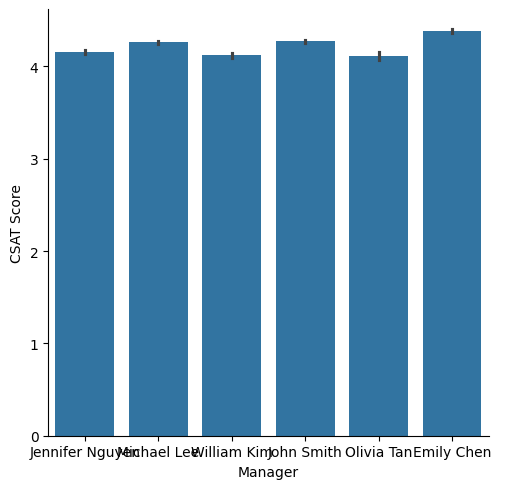

In [100]:
sns.catplot(data=CS_data, x="Manager", y="CSAT Score",
            kind="bar");

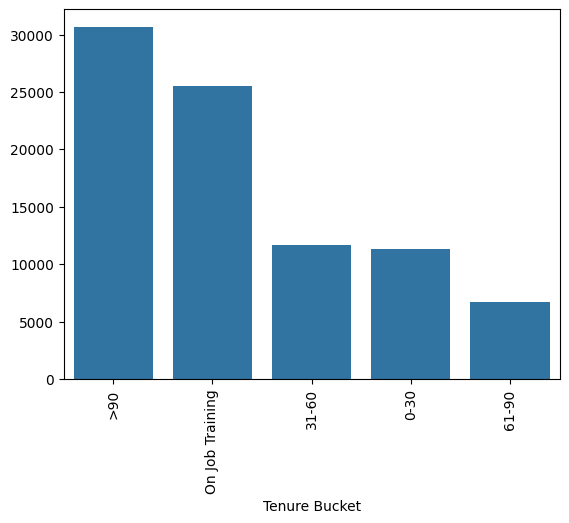

In [101]:
counts = CS_data['Tenure Bucket'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.show()

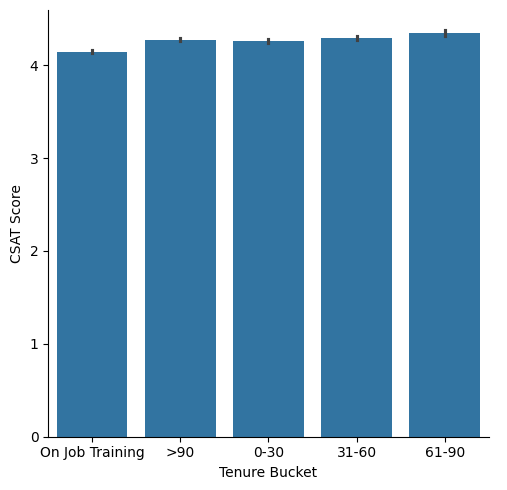

In [102]:
sns.catplot(data=CS_data, x="Tenure Bucket", y="CSAT Score",
            kind="bar");

**Укрупнение категорий**

In [103]:
CS_data["Customer Remarks New"] = (CS_data["Customer Remarks"].str.len() > 3).astype(int)

In [30]:
CS_data["Customer Remarks New"].values

array([0, 0, 0, ..., 1, 0, 0])

In [31]:
CS_data["Is_order"] = (CS_data["Order_id"].isna()).astype(int)

In [32]:
CS_data["Is_order"].values

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
CS_data.loc[~CS_data["Sub-category"].isin([
    "Reverse Pickup Enquiry", "Return request", "Delayed", "Order status enquiry", 
    "Installation/demo", "Fraudulent User", "Product Specific Information"
    ]), "Sub-category"] = "Other"

In [34]:
CS_data["Sub-category"].value_counts()

Sub-category
Other                           28872
Reverse Pickup Enquiry          22389
Return request                   8523
Delayed                          7388
Order status enquiry             6922
Installation/demo                4116
Fraudulent User                  4108
Product Specific Information     3589
Name: count, dtype: int64

**Добавление агрегированной информации**

In [35]:
CS_data.groupby(["Agent_name"]).agg({'Agent_name': 'count'})

,Agent_name
Agent_name,
Aaron Edwards,93
Aaron Romero,59
Abigail Gonzalez,25
Adam Barnett,56
Adam Hammond,60
...,...
Yesenia Bowers,50
Zachary Collins,75
Zachary Ford,62


In [36]:
CS_data['Agent_count'] = CS_data.groupby(["Agent_name"])["Agent_name"].transform('count')

In [37]:
CS_data.head()

,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,...,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Customer Remarks New,Is_order,Agent_count
Unique id,,,,,,,,,,,,,,,,,,,,,
7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Other,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,...,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,0,0,42
b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,...,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,0,0,32
200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,...,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,0,0,35
eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,...,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,0,0,48
ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Other,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,...,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,0,0,124


In [38]:
CS_data.groupby(["Supervisor"]).agg({'Agent_name': 'nunique'})

,Agent_name
Supervisor,
Abigail Suzuki,38
Aiden Patel,41
Alexander Tanaka,15
Amelia Tanaka,19
Austin Johnson,29
Ava Wong,70
Brayden Wong,45
Carter Park,64
Charlotte Suzuki,22


In [39]:
CS_data['Sups_no_agents'] = CS_data.groupby(["Supervisor"])["Agent_name"].transform('nunique')

**Заполнение отсутствующих значений**

In [40]:
CS_data['Product_category'] = CS_data['Product_category'].fillna('unknown')

In [41]:
CS_data['connected_handling_time'] = CS_data['connected_handling_time'].fillna('0')

**Преобразование бинарных атрибутов**

In [42]:
from sklearn.preprocessing import LabelEncoder
LE_sex = LabelEncoder()
T_data.Sex = LE_sex.fit_transform(T_data.Sex)

In [43]:
T_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,third,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,third,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,third,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,second,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,first,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,third,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,first,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [44]:
T_data.Pclass.replace({
    'first': 1, 'second': 2, 'third': 3
}, inplace=True)

In [45]:
T_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


**Преобразование номинальных атрибутов**

In [46]:
from sklearn.preprocessing import OneHotEncoder
OH_embarked = OneHotEncoder(sparse_output=False)
OH_embarked.fit_transform(T_data[['Embarked']])

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [47]:
OH_embarked.get_feature_names_out(['Embarked'])

array(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan'],
      dtype=object)

In [48]:
dummies = pd.DataFrame(OH_embarked.fit_transform(T_data[['Embarked']]),
                       columns=OH_embarked.get_feature_names_out(['Embarked']), 
                       index = T_data.index)

In [49]:
dummies 

,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
886,0.0,0.0,1.0,0.0
887,0.0,0.0,1.0,0.0
888,0.0,0.0,1.0,0.0
889,1.0,0.0,0.0,0.0


In [50]:
T_dummies = pd.concat([T_data, dummies]).drop(["Embarked"], axis=1)
T_dummies

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",1.0,22.0,1.0,0.0,A/5 21171,7.2500,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1.0,0.0,PC 17599,71.2833,C85,NaN,NaN,NaN,NaN
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",0.0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,NaN,NaN,NaN,NaN
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1.0,0.0,113803,53.1000,C123,NaN,NaN,NaN,NaN
4,5.0,0.0,3.0,"Allen, Mr. William Henry",1.0,35.0,0.0,0.0,373450,8.0500,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0


**Удаление лишних столбцов и массовое преобразование**

In [51]:
CS_dropped = CS_data.drop([
    "Sub-category",
    "Customer Remarks",
    "Customer_City", 
    "Agent_name", 
    "Supervisor",
    "Order_id",
    "order_date_time",
    "Issue_reported at",
    "issue_responded",
    "Survey_response_Date",
    "Item_price",

], axis=1)

In [52]:
CS_dropped.head()

,channel_name,category,Product_category,connected_handling_time,Manager,Tenure Bucket,Agent Shift,CSAT Score,Customer Remarks New,Is_order,Agent_count,Sups_no_agents
Unique id,,,,,,,,,,,,
7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,unknown,0,Jennifer Nguyen,On Job Training,Morning,5,0,0,42,41
b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,unknown,0,Michael Lee,>90,Morning,5,0,0,32,17
200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,unknown,0,William Kim,On Job Training,Evening,5,0,0,35,46
eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,unknown,0,John Smith,>90,Evening,5,0,0,48,28
ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,unknown,0,Michael Lee,0-30,Morning,5,0,0,124,29


In [53]:
CS_dropped.describe()

,CSAT Score,Customer Remarks New,Is_order,Agent_count,Sups_no_agents
count,85907.000000,85907.000000,85907.000000,85907.000000,85907.000000
mean,4.242157,0.319008,0.212230,82.733433,41.358690
std,1.378903,0.466095,0.408889,47.494745,15.862947
min,1.000000,0.000000,0.000000,20.000000,5.000000
25%,4.000000,0.000000,0.000000,53.000000,29.000000
50%,5.000000,0.000000,0.000000,75.000000,41.000000
75%,5.000000,1.000000,0.000000,102.000000,55.000000
max,5.000000,1.000000,1.000000,429.000000,70.000000


In [54]:
CS_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85907 entries, 7e9ae164-6a8b-4521-a2d4-58f7c9fff13f to 07c7a878-0d5a-42e0-97ef-de59abec0238
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   channel_name             85907 non-null  object
 1   category                 85907 non-null  object
 2   Product_category         85907 non-null  object
 3   connected_handling_time  85907 non-null  object
 4   Manager                  85907 non-null  object
 5   Tenure Bucket            85907 non-null  object
 6   Agent Shift              85907 non-null  object
 7   CSAT Score               85907 non-null  int64 
 8   Customer Remarks New     85907 non-null  int32 
 9   Is_order                 85907 non-null  int32 
 10  Agent_count              85907 non-null  int64 
 11  Sups_no_agents           85907 non-null  int64 
dtypes: int32(2), int64(3), object(7)
memory usage: 9.9+ MB


In [55]:
CS_dummies = pd.get_dummies(CS_dropped)

In [56]:
CS_dummies.shape

(85907, 258)

# Задания для самостоятельного выполнения

### 1. Постройте визуализацию распределения признаков и совместного распределения признаков и целевой переменной с помощью тепловых карт. Попробуйте использовать другие инструменты визуализации.

In [57]:
CS_data.head()

,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,...,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Customer Remarks New,Is_order,Agent_count,Sups_no_agents
Unique id,,,,,,,,,,,,,,,,,,,,,
7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Other,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,...,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,0,0,42,41
b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,...,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,0,0,32,17
200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,...,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,0,0,35,46
eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,...,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,0,0,48,28
ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Other,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,...,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,0,0,124,29


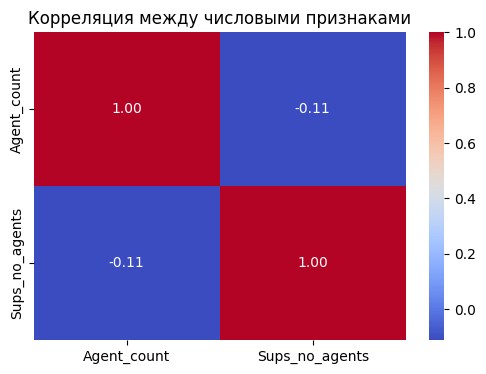

In [58]:
df = CS_data[['Agent_count', 'Sups_no_agents']]

corr_matrix = df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляция между числовыми признаками')
plt.show()

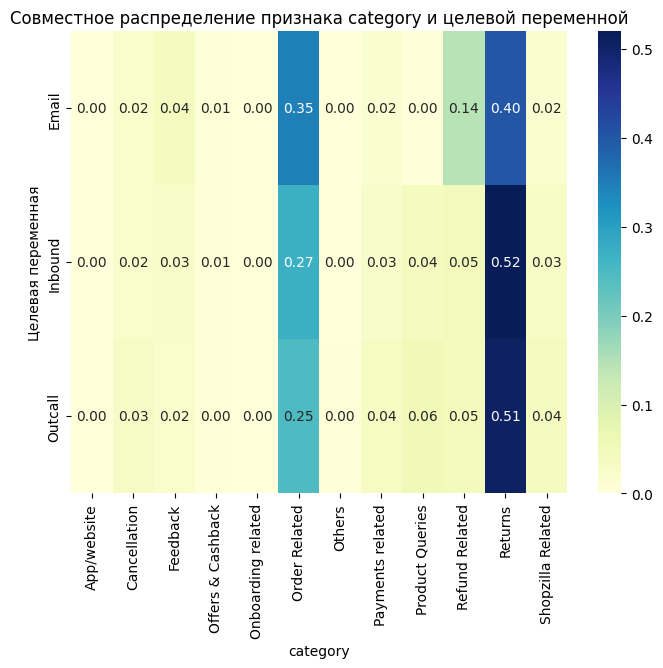

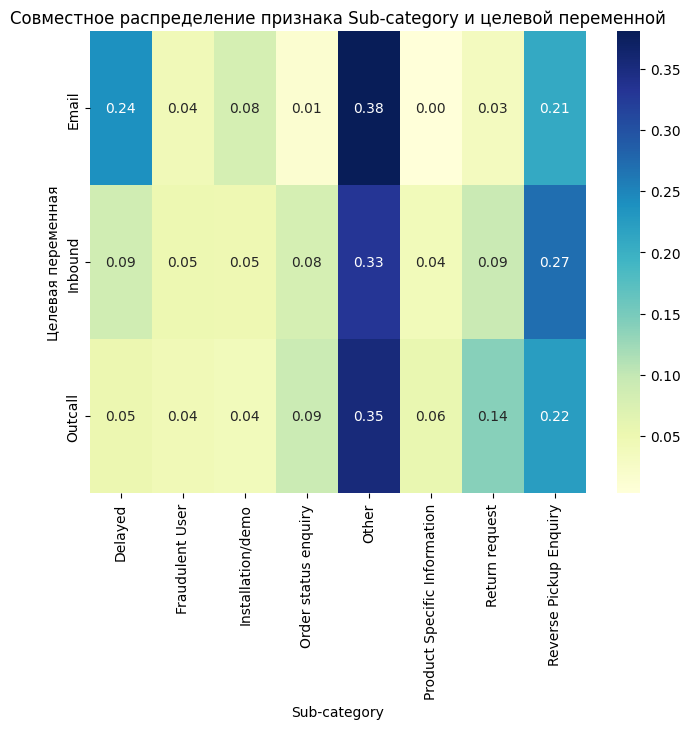

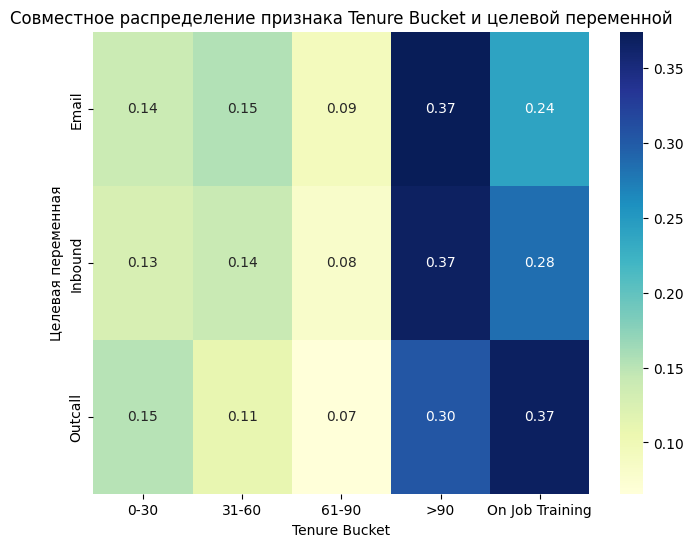

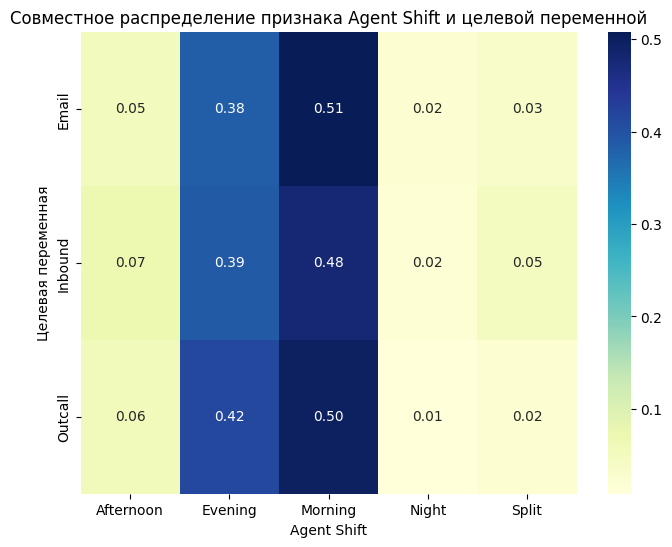

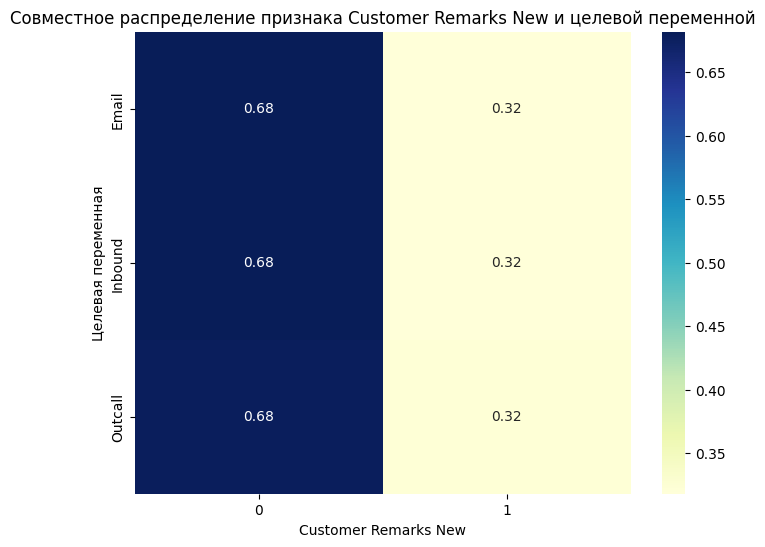

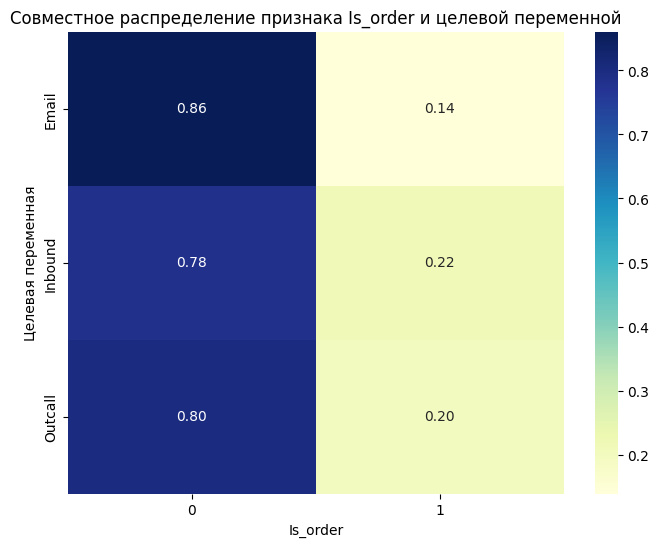

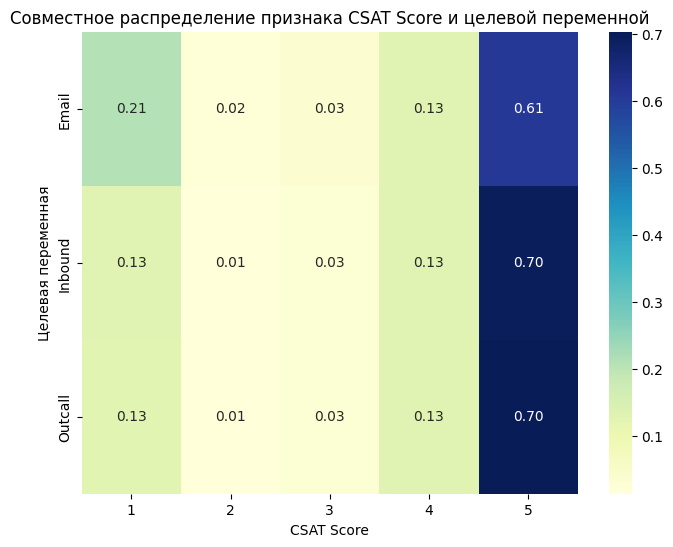

In [59]:
features = ['category', 'Sub-category', 'Tenure Bucket', 'Agent Shift', 'Customer Remarks New',
           'Is_order', 'CSAT Score']

for feature in features:
    category_channel_matrix = pd.crosstab(index=CS_data['channel_name'], columns=CS_data[feature], normalize='index')

    plt.figure(figsize=(8, 6))
    sns.heatmap(category_channel_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
    plt.title(f'Совместное распределение признака {feature} и целевой переменной')
    plt.xlabel(feature)
    plt.ylabel('Целевая переменная')
    plt.show()

### 2. Постройте на получившимся датасете Customer support модель дерева решений и проанализируйте важность признаков. Сделайте вывод об адекватности наших предположений.

In [60]:
CS_dummies.head()

,CSAT Score,Customer Remarks New,Is_order,Agent_count,Sups_no_agents,channel_name_Email,channel_name_Inbound,channel_name_Outcall,category_App/website,category_Cancellation,...,Tenure Bucket_0-30,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training,Agent Shift_Afternoon,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split
Unique id,,,,,,,,,,,,,,,,,,,,,
7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,5,0,0,42,41,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
b07ec1b0-f376-43b6-86df-ec03da3b2e16,5,0,0,32,17,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
200814dd-27c7-4149-ba2b-bd3af3092880,5,0,0,35,46,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
eb0d3e53-c1ca-42d3-8486-e42c8d622135,5,0,0,48,28,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
ba903143-1e54-406c-b969-46c52f92e5df,5,0,0,124,29,False,True,False,False,True,...,True,False,False,False,False,False,False,True,False,False


In [61]:
X = CS_dummies.drop(['channel_name_Outcall', 'channel_name_Inbound', 'channel_name_Email'], axis=1)
y = CS_dropped['channel_name']

model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

,Feature,Importance
3,Agent_count,0.253213
0,CSAT Score,0.149271
4,Sups_no_agents,0.112213
1,Customer Remarks New,0.091076
2,Is_order,0.039548
15,category_Returns,0.033869
10,category_Order Related,0.032647
13,category_Product Queries,0.016321
249,Tenure Bucket_On Job Training,0.016313
7,category_Feedback,0.014887


### 3. Разбейте датасет на тестовую и обучающую выборки и преобразуйте обе подвыборки. Тестовую нужно преобразовывать точно также, как и обучающую (с теми же параметрами).

In [62]:
X = CS_dummies.drop(['channel_name_Outcall', 'channel_name_Inbound', 'channel_name_Email'], axis=1)
y = CS_dropped['channel_name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       Email       0.09      0.09      0.09       595
     Inbound       0.81      0.87      0.84     13644
     Outcall       0.28      0.19      0.23      2943

    accuracy                           0.73     17182
   macro avg       0.39      0.38      0.39     17182
weighted avg       0.70      0.73      0.71     17182



In [63]:
feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

,Feature,Importance
3,Agent_count,0.247118
0,CSAT Score,0.145558
4,Sups_no_agents,0.112500
1,Customer Remarks New,0.097801
10,category_Order Related,0.037571
15,category_Returns,0.036879
2,Is_order,0.033872
252,Agent Shift_Morning,0.016741
13,category_Product Queries,0.016079
249,Tenure Bucket_On Job Training,0.015649


### 4. Проведите полный анализ на датасете Титаник, включая все необходимые визуализации и выводы.

In [106]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    object 
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [108]:
titanic_df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

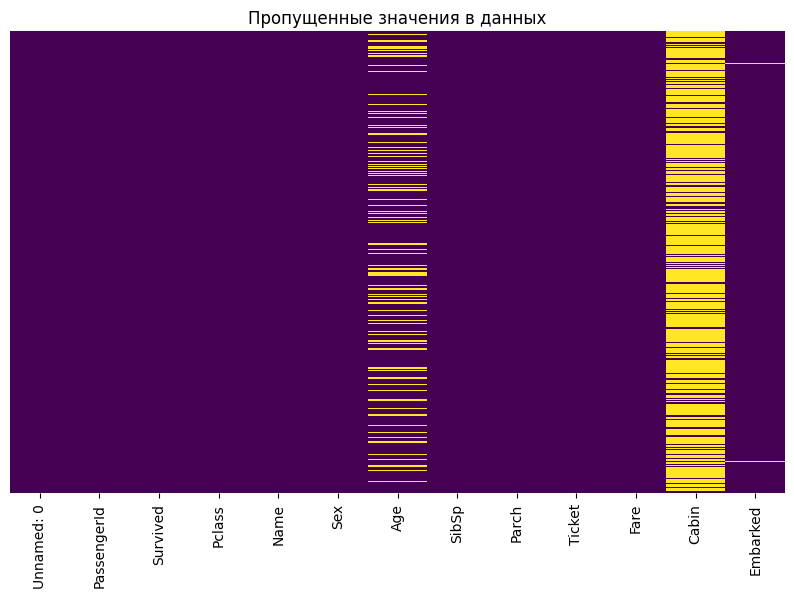

In [109]:
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Пропущенные значения в данных')
plt.show()

In [110]:
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

titanic_df.drop('Cabin', axis=1, inplace=True)

titanic_df.isnull().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

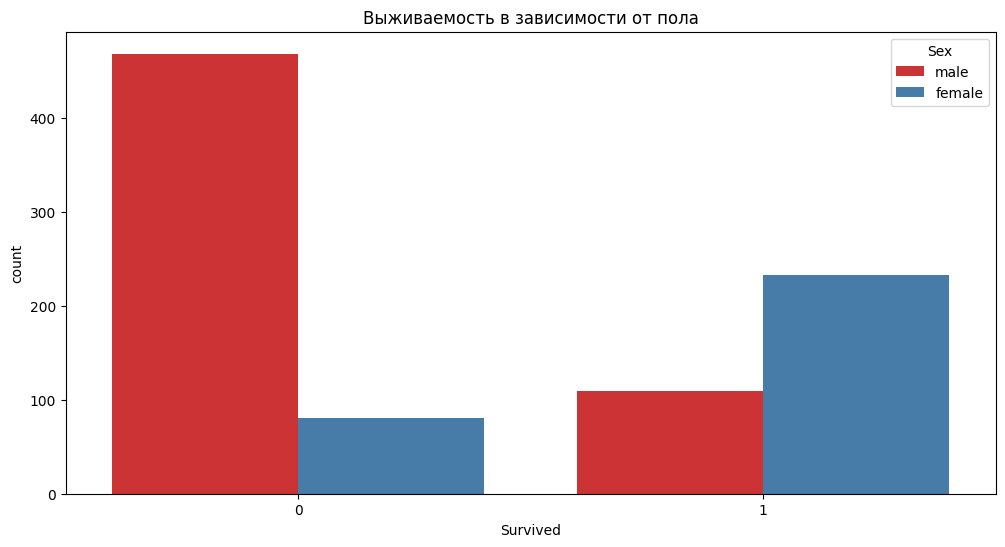

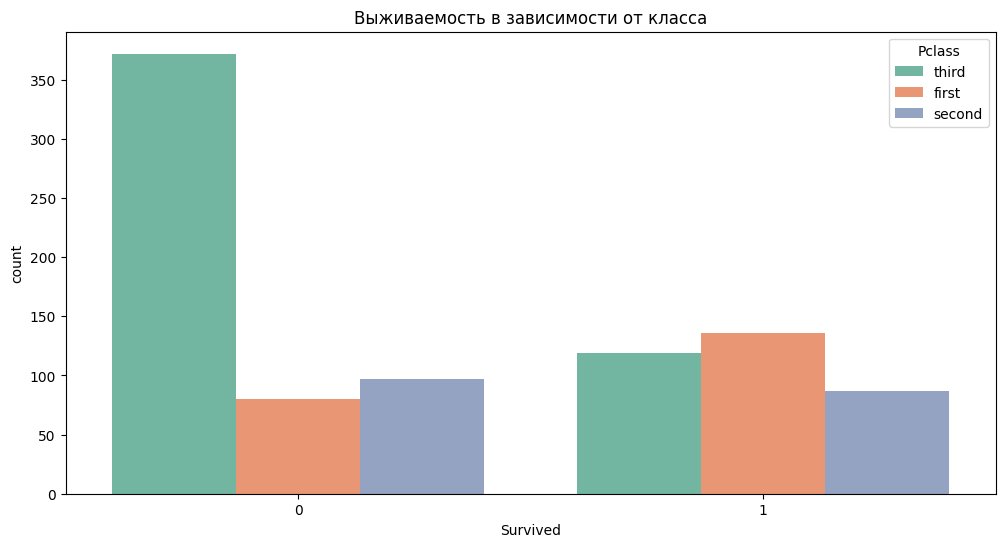

In [111]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Survived', hue='Sex', data=titanic_df, palette='Set1')
plt.title('Выживаемость в зависимости от пола')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Survived', hue='Pclass', data=titanic_df, palette='Set2')
plt.title('Выживаемость в зависимости от класса')
plt.show()

In [112]:
sex = pd.get_dummies(titanic_df['Sex'], drop_first=True)
embark = pd.get_dummies(titanic_df['Embarked'], drop_first=True)

titanic_df = pd.concat([titanic_df, sex, embark], axis=1)

titanic_df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

titanic_df.Pclass.replace({
    'first': 1, 'second': 2, 'third': 3
}, inplace=True)

X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



### 5. Проверьте целесообразность каждого необязательного преобразования данных путем проверки, увеличивает ли данное преобразование точность модели. Проверьте на простом виде модели (линейная регрессия, дерево решений или случайный лес). Поэкспериментируйте с различными вариантами преобразований.

In [191]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [192]:
titanic_df.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [193]:
titanic_df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,third,22.0,1,0,7.2500
1,1,2,1,first,38.0,1,0,71.2833
2,2,3,1,third,26.0,0,0,7.9250
3,3,4,1,first,35.0,1,0,53.1000
4,4,5,0,third,35.0,0,0,8.0500


In [194]:
titanic_df.Pclass.replace({
    'first': 1, 'second': 2, 'third': 3
}, inplace=True)

X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [195]:
X['Age'].fillna(X['Age'].median(), inplace=True)

In [196]:
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=5)
    return scores.mean()

In [197]:
baseline_accuracy = evaluate_model(LogisticRegression(), X, y)
print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.6869499717531855


In [198]:
X_ = X.drop('Unnamed: 0', axis=1)
accuracy = evaluate_model(LogisticRegression(), X_, y)
print(accuracy)
print("Accuracy change:", accuracy - baseline_accuracy)

0.6891720544849664
Accuracy change: 0.0022220827317809277


In [202]:
X_ = titanic_df.drop(['PassengerId','Unnamed: 0'], axis=1)
X_ = pd.get_dummies(X_, columns=['Pclass'], drop_first=True)
X_['Age'].fillna(X_['Age'].median(), inplace=True)
accuracy = evaluate_model(LogisticRegression(), X_, y)
print(accuracy)
print("Accuracy change:", accuracy - baseline_accuracy)

1.0
Accuracy change: 0.3130500282468145


In [203]:
X_ = X.drop(['PassengerId','Unnamed: 0'], axis=1)
accuracy = evaluate_model(LogisticRegression(), X_, y)
print(accuracy)
print("Accuracy change:", accuracy - baseline_accuracy)

0.6947837549431924
Accuracy change: 0.007833783190006938


In [204]:
X_age_mean = X.copy()
X_age_mean['Age'].fillna(X_age_mean['Age'].median(), inplace=True)
accuracy_age_mean = evaluate_model(LogisticRegression(), X_age_mean, y)
print(accuracy_age_mean)
print("Accuracy change:", accuracy_age_mean - baseline_accuracy)

0.6869499717531855
Accuracy change: 0.0


### 6. Создайте воспроизводимый код обработки данного датасета.

In [205]:
titanic_df = pd.read_csv('titanic.csv')

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df.drop('Cabin', axis=1, inplace=True)

titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)
titanic_df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,1,0,third,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,True,False,True
1,1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,False,False,False
2,2,3,1,third,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,False,False,True
3,3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,False,False,True
4,4,5,0,third,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,second,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,True,False,True
887,887,888,1,first,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,False,False,True
888,888,889,0,third,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,False,False,True
889,889,890,1,first,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,True,False,False


In [175]:
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)